# **Library**

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Explore Data**

In [391]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [392]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [393]:
print(train_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [394]:
print(train_data['Pclass'].value_counts(),end = '\n------------------\n')
print(train_data['Name'].value_counts(),end = '\n------------------\n')
print(train_data['Sex'].value_counts(),end = '\n------------------\n')
print(train_data['Age'].value_counts(),end = '\n------------------\n')
print(train_data['SibSp'].value_counts(),end = '\n------------------\n')
print(train_data['Parch'].value_counts(),end = '\n------------------\n')
print(train_data['Ticket'].value_counts(),end = '\n------------------\n')
print(train_data['Fare'].value_counts(),end = '\n------------------\n')
print(train_data['Cabin'].value_counts(),end = '\n------------------\n')
print(train_data['Embarked'].value_counts(),end = '\n------------------\n')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
------------------
Sex
male      577
female    314
Name: count, dtype: int64
------------------
Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Lengt

# **Feature Engineering**

In [395]:
train_data['Title_Name'] = train_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [396]:
train_data['Title_Ticket'] = train_data['Ticket'].str.extract(r'^([^\d]*)', expand=False)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name,Title_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,A/
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,STON/O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,


In [397]:
print(train_data['Title_Name'].value_counts(),end = "\n______________\n")
print(train_data['Title_Ticket'].value_counts(),end = "\n______________\n")

Title_Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
______________
Title_Ticket
                661
PC               60
C.A.             27
A/               23
STON/O           12
W./C.             9
SOTON/O.Q.        8
CA.               8
SOTON/OQ          7
STON/O            6
CA                6
SC/PARIS          5
C                 5
S.O.C.            5
F.C.C.            5
LINE              4
SC/Paris          4
PP                3
S.O./P.P.         3
A./               2
WE/P              2
A.                2
P/PP              2
SC/AH             2
S.C./PARIS        2
SOTON/O           2
S.C./A.           1
S.O.P.            1
Fa                1
A              

In [398]:
train_data.drop(['Cabin'],axis=1,inplace=True)

In [399]:
train_data.dropna(inplace=True)

In [400]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    int64  
 1   Survived      712 non-null    int64  
 2   Pclass        712 non-null    int64  
 3   Name          712 non-null    object 
 4   Sex           712 non-null    object 
 5   Age           712 non-null    float64
 6   SibSp         712 non-null    int64  
 7   Parch         712 non-null    int64  
 8   Ticket        712 non-null    object 
 9   Fare          712 non-null    float64
 10  Embarked      712 non-null    object 
 11  Title_Name    712 non-null    object 
 12  Title_Ticket  712 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 77.9+ KB


In [401]:
print(train_data['Survived'].value_counts())

Survived
0    424
1    288
Name: count, dtype: int64


In [402]:
dummies_data = pd.get_dummies(train_data[['Sex', 'Embarked','Title_Name']])
dummies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Sex_female               712 non-null    bool 
 1   Sex_male                 712 non-null    bool 
 2   Embarked_C               712 non-null    bool 
 3   Embarked_Q               712 non-null    bool 
 4   Embarked_S               712 non-null    bool 
 5   Title_Name_Capt          712 non-null    bool 
 6   Title_Name_Col           712 non-null    bool 
 7   Title_Name_Don           712 non-null    bool 
 8   Title_Name_Dr            712 non-null    bool 
 9   Title_Name_Jonkheer      712 non-null    bool 
 10  Title_Name_Lady          712 non-null    bool 
 11  Title_Name_Major         712 non-null    bool 
 12  Title_Name_Master        712 non-null    bool 
 13  Title_Name_Miss          712 non-null    bool 
 14  Title_Name_Mlle          712 non-null    bool 
 15  Title_Name_

In [403]:
train_data = train_data.merge(dummies_data,left_index=True,right_index=True,how='inner')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Name_Master,Title_Name_Miss,Title_Name_Mlle,Title_Name_Mme,Title_Name_Mr,Title_Name_Mrs,Title_Name_Ms,Title_Name_Rev,Title_Name_Sir,Title_Name_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,True,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,True,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,False,False,False,True,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,...,False,False,False,False,False,True,False,False,False,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,False,False,False,False,False,False,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,False,True,False,False,False,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,False,False,False,False,True,False,False,False,False,False


In [404]:
features = list(set(list(train_data.columns))-set(list(['Name','Sex','Ticket','PassengerId','index','Title_Name','Title_Ticket','Embarked','Title_Name_Sir','Title_Name_Lady','Title_Name_Jonkheer','Title_Name_Mlle','Title_Name_Capt','Title_Name_Don','Title_Name_the Countess','Title_Name_Mme','Title_Name_Major'])))
# features
X = train_data[features]
y = train_data['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Embarked_C         712 non-null    bool   
 1   Embarked_Q         712 non-null    bool   
 2   Title_Name_Col     712 non-null    bool   
 3   Survived           712 non-null    int64  
 4   Parch              712 non-null    int64  
 5   Title_Name_Mrs     712 non-null    bool   
 6   Sex_female         712 non-null    bool   
 7   Age                712 non-null    float64
 8   Pclass             712 non-null    int64  
 9   Fare               712 non-null    float64
 10  Sex_male           712 non-null    bool   
 11  SibSp              712 non-null    int64  
 12  Title_Name_Miss    712 non-null    bool   
 13  Title_Name_Rev     712 non-null    bool   
 14  Title_Name_Mr      712 non-null    bool   
 15  Title_Name_Master  712 non-null    bool   
 16  Title_Name_Ms      712 non-null

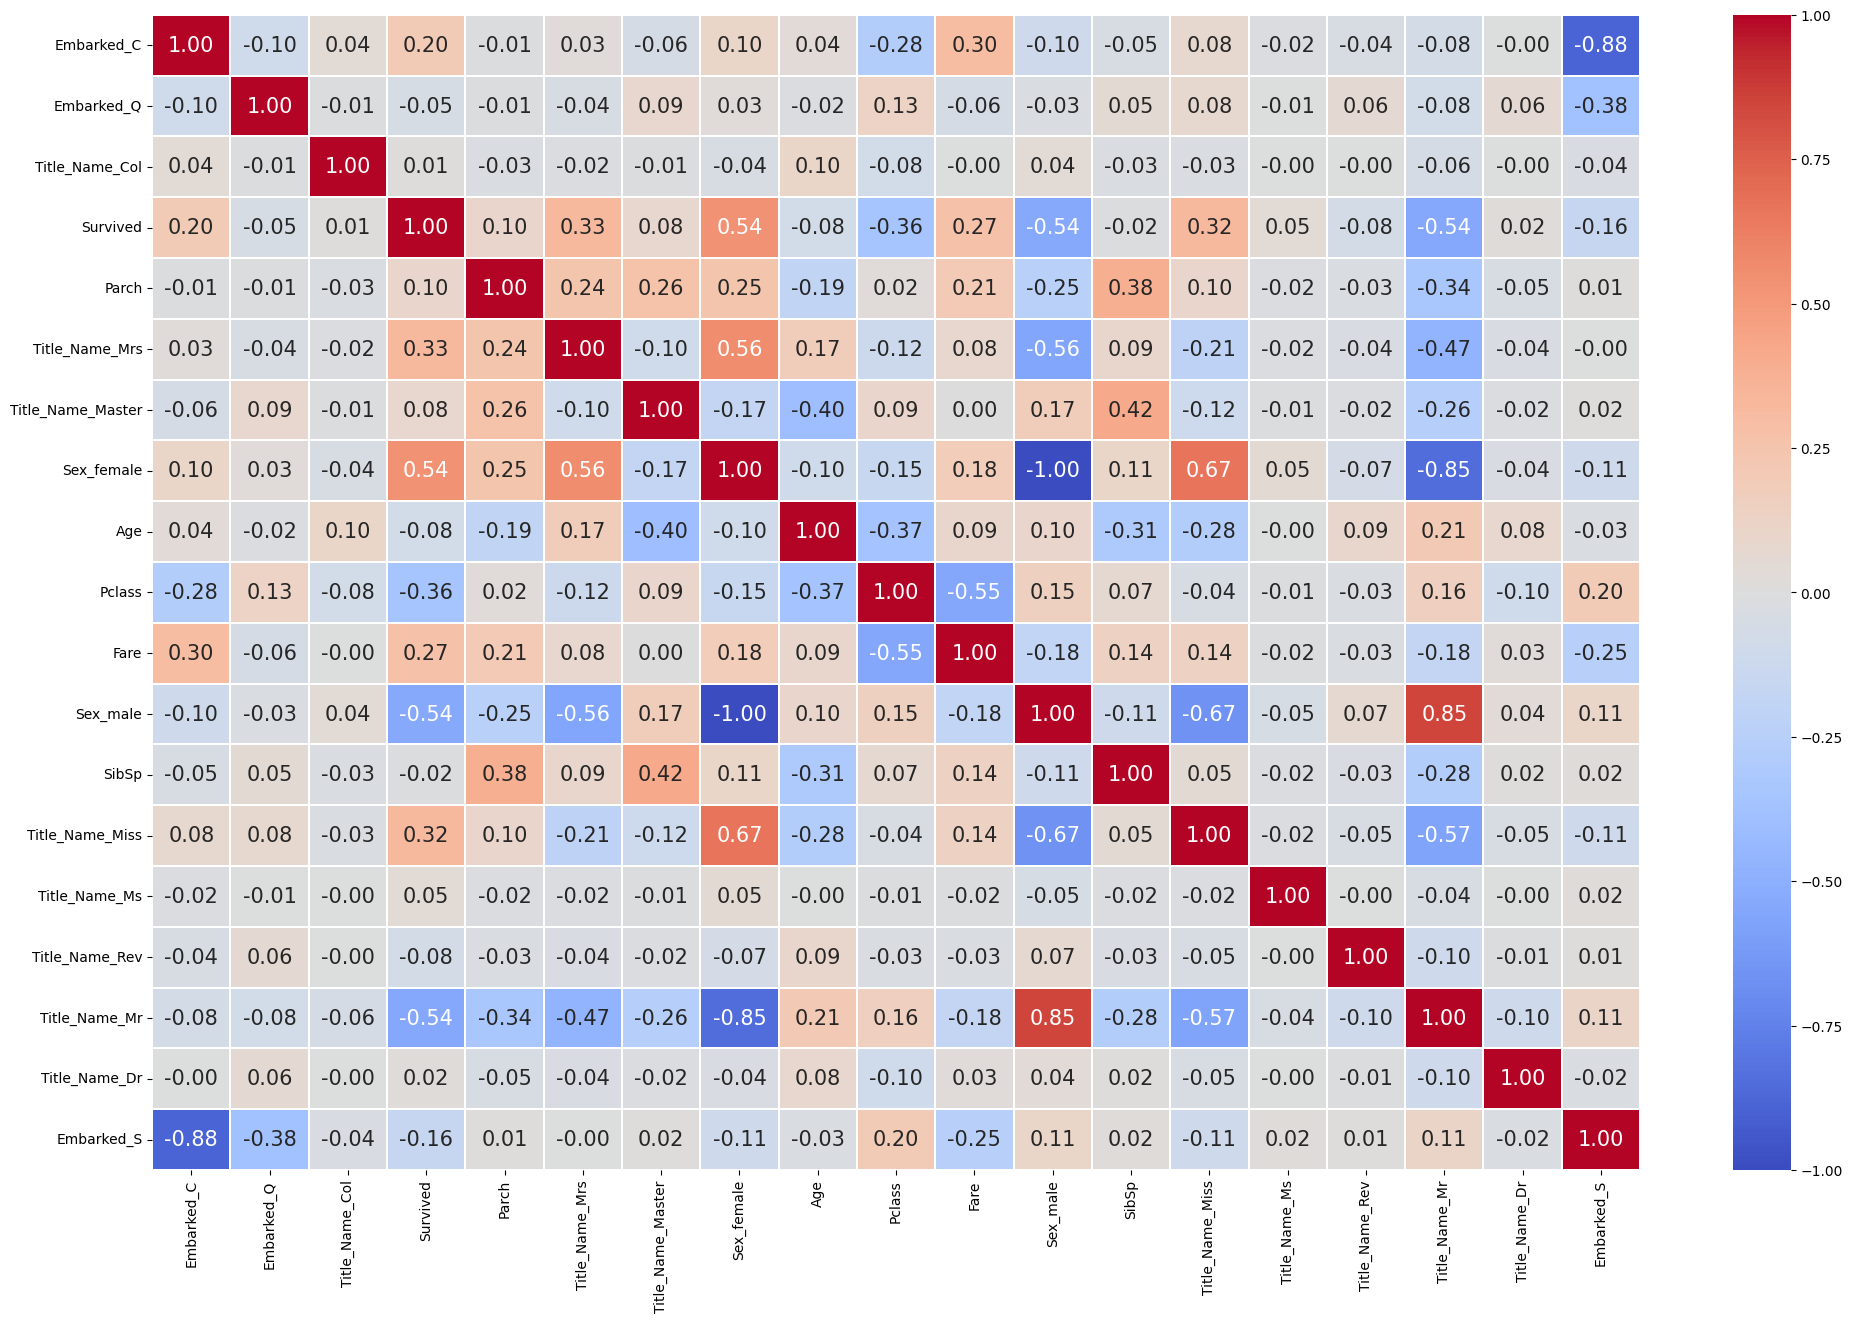

In [405]:
cols = list(set(X.columns) - {'id'})
corr_matrix = X[cols].corr()

plt.figure(figsize=(24, 15))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.1,
    annot_kws={'size': 15}
)

In [406]:
X.drop(['Survived'], axis=1, inplace=True)
X = X.sort_index(axis=1)

/tmp/ipykernel_26192/3054130058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Survived'], axis=1, inplace=True)


# **Model**

## 1) Logistic Regression

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [408]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
ls_y_hat_train = []
ls_y_train = []

logreg_model = logreg.fit(X_train, y_train)
y_hat_train = logreg_model.predict(X_train)
ls_y_hat_train.extend(y_hat_train)
ls_y_train.extend(y_train)
report_train = classification_report(ls_y_train, ls_y_hat_train)
print('training set')
print(report_train) 

ls_y_hat_test = []
ls_y_test = []
y_hat_test = logreg_model.predict(X_test)
ls_y_hat_test.extend(y_hat_test)
ls_y_test.extend(y_test)
report_test = classification_report(ls_y_test, ls_y_hat_test)
print('test set')
print(report_test) 

training set
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       342
           1       0.77      0.78      0.78       227

    accuracy                           0.82       569
   macro avg       0.81      0.81      0.81       569
weighted avg       0.82      0.82      0.82       569

test set
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.79      0.79      0.79        61

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



In [409]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(x_scaled)
X_train_scaled.columns = X_train.columns

x_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(x_scaled)
X_test_scaled.columns = X_test.columns

In [410]:
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []

  clf_model = clf.fit(X_train, y_train)
  y_hat_train = clf_model.predict(X_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  print('training set')
  print(report_train) 
  print('\n')
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = clf_model.predict(X_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)
  print('test set')
  print(report_test) 
  print('\n')

  if show_feature_importance:
    try:
      print('Standardized Coeff.')
      print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.coef_[0]}).to_string())
    except:
      try:
        print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.feature_importances_}).to_string())
      except:
        print("No Standardized Coeff.")

In [411]:
classification_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       342
           1       0.77      0.78      0.78       227

    accuracy                           0.82       569
   macro avg       0.81      0.81      0.81       569
weighted avg       0.82      0.82      0.82       569



test set
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.80      0.79      0.79        61

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.82      0.83      0.82       143



Standardized Coeff.
              Feature  Coefficients
0                 Age     -0.365032
1          Embarked_C      0.157060
2          Embarked_Q     -0.121265
3          Embarked_S     -0.092761
4                Fare      0.265652
5               Parch     -0.259603
6              Pclass     -0.782968
7          S

## 2) Decision Tree

In [412]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

classification_model(dt_clf, X_train_scaled, y_train, X_test_scaled, y_test, show_feature_importance=True)

training set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       342
           1       1.00      0.99      0.99       227

    accuracy                           0.99       569
   macro avg       1.00      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



test set
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        82
           1       0.63      0.74      0.68        61

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.70       143
weighted avg       0.72      0.71      0.71       143



Standardized Coeff.
              Feature  Coefficients
0                 Age      0.230033
1          Embarked_C      0.006167
2          Embarked_Q      0.005936
3          Embarked_S      0.016524
4                Fare      0.220763
5               Parch      0.026706
6              Pclass      0.141515
7          S

## 3) Support Vector Machine (SVM)

In [413]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='linear', gamma='auto')

classification_model(svc_clf, X_train_scaled, y_train, X_test_scaled, y_test, show_feature_importance=True)

training set
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       342
           1       0.82      0.73      0.77       227

    accuracy                           0.83       569
   macro avg       0.83      0.81      0.82       569
weighted avg       0.83      0.83      0.83       569



test set
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        82
           1       0.79      0.74      0.76        61

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143



Standardized Coeff.
              Feature  Coefficients
0                 Age -2.064684e-01
1          Embarked_C  7.003876e-02
2          Embarked_Q -7.355335e-02
3          Embarked_S -3.261955e-02
4                Fare  2.558251e-01
5               Parch -2.727782e-01
6              Pclass -1.966461e-01
7          S

## 4) K Nearest Neighbor (KNN)

In [414]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(5)

classification_model(knn_clf, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       342
           1       0.86      0.79      0.83       227

    accuracy                           0.87       569
   macro avg       0.87      0.85      0.86       569
weighted avg       0.87      0.87      0.87       569



test set
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        82
           1       0.75      0.64      0.69        61

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



Standardized Coeff.
No Standardized Coeff.


## 5) Random Forest

In [415]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=4, random_state=0)

classification_model(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       342
           1       0.84      0.74      0.79       227

    accuracy                           0.84       569
   macro avg       0.84      0.82      0.83       569
weighted avg       0.84      0.84      0.84       569



test set
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.80      0.77      0.78        61

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



Standardized Coeff.
              Feature  Coefficients
0                 Age      0.050171
1          Embarked_C      0.020144
2          Embarked_Q      0.005047
3          Embarked_S      0.014116
4                Fare      0.132301
5               Parch      0.024677
6              Pclass      0.110083
7          S

## 6) XGBoost

In [416]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)

classification_model(xgb_clf, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       342
           1       0.92      0.66      0.77       227

    accuracy                           0.84       569
   macro avg       0.86      0.81      0.82       569
weighted avg       0.85      0.84      0.83       569



test set
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        82
           1       0.90      0.44      0.59        61

    accuracy                           0.74       143
   macro avg       0.80      0.70      0.70       143
weighted avg       0.78      0.74      0.72       143



Standardized Coeff.
              Feature  Coefficients
0                 Age      0.013950
1          Embarked_C      0.011521
2          Embarked_Q      0.004454
3          Embarked_S      0.010627
4                Fare      0.025107
5               Parch      0.015947
6              Pclass      0.068232
7          S

# **Manage Data Test**

In [417]:
test_data['Title_Name'] = test_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
dummies_data = pd.get_dummies(test_data[['Sex', 'Embarked','Title_Name']])
test_data = test_data.merge(dummies_data,left_index=True,right_index=True,how='inner')
features = list(set(list(test_data.columns))-set(list(['Name','Sex','Ticket','PassengerId','index','Title_Name','Title_Ticket','Embarked','Cabin','Title_Name_Dona'])))
# features
X_test = test_data[features]
X_test.fillna(X_test.mean(),inplace=True)
X_test = X_test.sort_index(axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                418 non-null    float64
 1   Embarked_C         418 non-null    bool   
 2   Embarked_Q         418 non-null    bool   
 3   Embarked_S         418 non-null    bool   
 4   Fare               418 non-null    float64
 5   Parch              418 non-null    int64  
 6   Pclass             418 non-null    int64  
 7   Sex_female         418 non-null    bool   
 8   Sex_male           418 non-null    bool   
 9   SibSp              418 non-null    int64  
 10  Title_Name_Col     418 non-null    bool   
 11  Title_Name_Dr      418 non-null    bool   
 12  Title_Name_Master  418 non-null    bool   
 13  Title_Name_Miss    418 non-null    bool   
 14  Title_Name_Mr      418 non-null    bool   
 15  Title_Name_Mrs     418 non-null    bool   
 16  Title_Name_Ms      418 non

/tmp/ipykernel_26192/2218836165.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(),inplace=True)


In [418]:
X_test

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex_female,Sex_male,SibSp,Title_Name_Col,Title_Name_Dr,Title_Name_Master,Title_Name_Miss,Title_Name_Mr,Title_Name_Mrs,Title_Name_Ms,Title_Name_Rev
0,34.50000,False,True,False,7.8292,0,3,False,True,0,False,False,False,False,True,False,False,False
1,47.00000,False,False,True,7.0000,0,3,True,False,1,False,False,False,False,False,True,False,False
2,62.00000,False,True,False,9.6875,0,2,False,True,0,False,False,False,False,True,False,False,False
3,27.00000,False,False,True,8.6625,0,3,False,True,0,False,False,False,False,True,False,False,False
4,22.00000,False,False,True,12.2875,1,3,True,False,1,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,False,False,True,8.0500,0,3,False,True,0,False,False,False,False,True,False,False,False
414,39.00000,True,False,False,108.9000,0,1,True,False,0,False,False,False,False,False,False,False,False
415,38.50000,False,False,True,7.2500,0,3,False,True,0,False,False,False,False,True,False,False,False
416,30.27259,False,False,True,8.0500,0,3,False,True,0,False,False,False,False,True,False,False,False


# **Submission**

In [419]:
y_test = svc_clf.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [420]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_test
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [421]:
submission.to_csv('submission.csv', index=False)